## American Sign Language Recognition Using Convolutional Neural Networks (CNN)

## Abstract.
This project  has to do with applying CNN to American Sign Lanaguage(ASL) . In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual images. Convolutional neural networks have been one of the most influential innovations in the field of computer vision. They have performed a lot better than traditional computer vision and have produced state-of-the-art results. These neural networks have proven to be successful in many different real-life case studies and applications, like: Image classification, object detection, segmentation, face recognition;
Self driving cars that leverage CNN based vision systems and it can also be apply in the American sign language to help people better communicate with those who are dumb and deft

## Introduction
Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and dumb, and is used by many hearing people as well.  The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. 

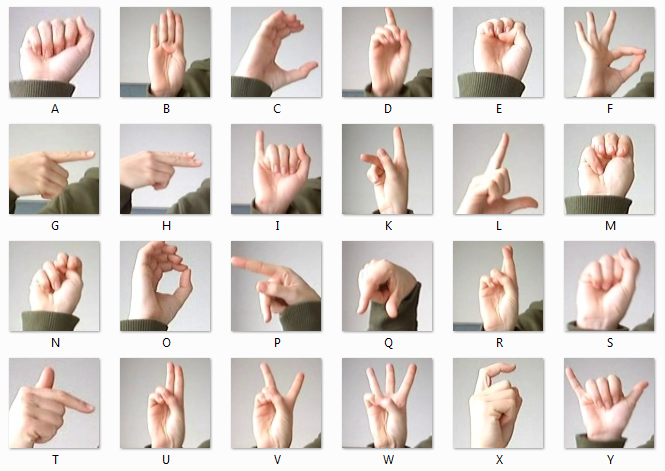

In [1]:
from PIL import Image
myImage = Image.open("amer_sign2.PNG");
myImage

## Problem statement

Communication is an important part of our lives. Deaf and dumb people being unable to speak and listen, experience a lot of problems while communicating with normal people. There are many ways by which people with these disabilities try to communicate. One of the most prominent ways is the use of sign language, i.e. hand gestures. Its difficult for normal people to understand these sign langauages without a translator. That's why It is necessary to develop an application for recognizing gestures and actions of sign language so that deaf and dumb people can communicate easily with even those who don’t understand sign language. 

The objective of this work is to take an elementary step in breaking the barrier in communication between the normal people and deaf and dumb people with the help of sign language.

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well. ![

## Business goal
The business goal is to develop an application which is able to recognised gestures and actions of sign language and interpret them to normal people . This way normal people can easily and effective communicate with deaf and dumb people without any need to go to a sign language school

## Motivation
Communication is a very important asepect of our day to day lives. it brings people together. Without communication we won't be able to understand each other.To be able to communicate effective you must be able to listen, speak , write and read effectively. That's why we need to develop such sign language application to aid communication with deaf and dumb people  with the rest of the world


## Dataset
The dataset is freely available on Kaggle and my github respiratory

## importing needed libraries

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

## Loading my ASL data 

In [4]:
# loading both train and test data
train_df=pd.read_csv('sign_ASL_train.csv')
test_df=pd.read_csv('sign_ASL_test.csv')

In [5]:
test = pd.read_csv('sign_ASL_test.csv')
y = test['label']

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [10]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


The train_df dataset consist of 1st column representing labels 1 to 24. The label is loaded in a seperate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [11]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


## Converting array from 1D to 3D needed for CNN

For CNN, my input is [batch_size, width, height, channels], so each image is a 3-D sub-tensor. Since your images are gray-scale, channels=1. Also for training all images must be of the same size - WIDTH and HEIGHT. 

Converting the dataframe to numpy array type to be used while training the CNN. The array is converted from 1-D to 3-D which is the required input to the first layer of the CNN. Similar preprocessing is done to the test dataframe.

In [12]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [13]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


## Converting the integer labels to binary form

The label dataframe consist of a single values from 1 to 24 for each individual picture

The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier

Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0]. The LabelBinarizer package from sklearn.preprocessing is used for that.

In [14]:
from sklearn.preprocessing import LabelBinarizer

In [15]:
lb=LabelBinarizer()

In [16]:
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [17]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [18]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [19]:
X_test=X_test.values.reshape(-1,28,28,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


## Data Augmentation

Image data augmentation is a technique that is used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize

Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class.

The image dataset is also normalised here using the rescale parameter which divides each pixel by 255 such that the pixel values range between 0 to 1.

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

In [21]:
train_datagen

## Vizualization of my data

This inolves understanding my datasets by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

Text(0.5, 1.0, 'Frequency of each label')

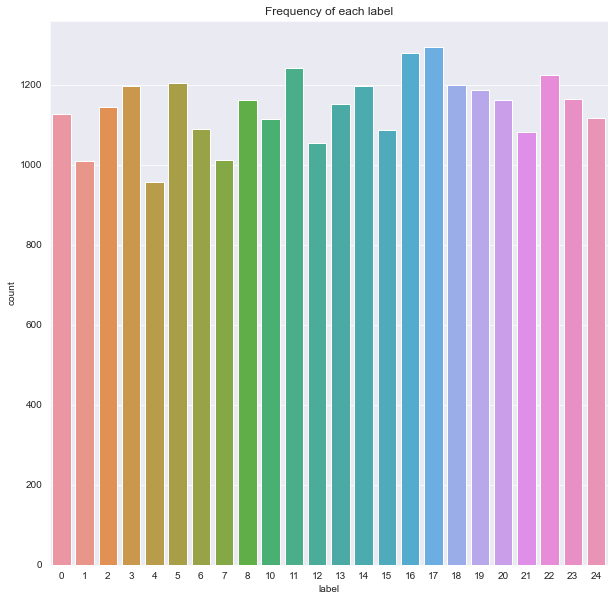

In [22]:
# label count
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
plt.title("Frequency of each label")

## Preview of images in the train data set

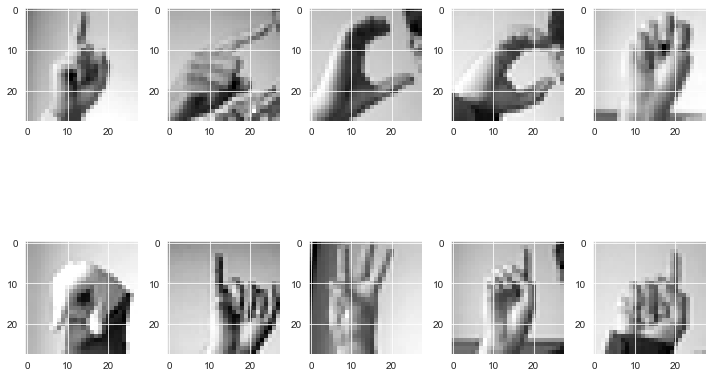

In [23]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()  

## Building CNN Model

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

CNN uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

A convolution does this by multiplying two matrices and yielding a third, smaller matrix.

The Network takes an input image, and uses a filter (or kernel) to create a feature map describing the image.

In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and slide it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This working can be seen in the following figure

The model consist of :

Three convolution layer each followed bt MaxPooling for better feature capture
A dense layer of 512 units
The output layer with 24 units for 24 different classes
Convolution layers

Conv layer 1 -- UNITS - 128 KERNEL SIZE - 5 * 5 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 2 -- UNITS - 64 KERNEL SIZE - 3 * 3 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 3 -- UNITS - 32 KERNEL SIZE - 2 * 2 STRIDE LENGTH - 1 ACTIVATION - ReLu

MaxPool layer 1 -- MAX POOL WINDOW - 3 * 3 STRIDE - 2

MaxPool layer 2 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

MaxPool layer 3 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

In [24]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

## Dense and output layers

In [25]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

## Compiling the model

After the model is created, compiling is done using the Adam optimizer, one of the most popular optimization algorithms. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Train the Model
It's finally time to train the model with Keras' fit() function! The model trains for 35 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [27]:
ASL_model=model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 50s 365ms/step - loss: 3.0348 - accuracy: 0.0936 - val_loss: 2.4964 - val_accuracy: 0.2471
Epoch 2/35
138/138 [==============================] - 50s 361ms/step - loss: 2.3157 - accuracy: 0.2741 - val_loss: 1.6479 - val_accuracy: 0.4548
Epoch 3/35
138/138 [==============================] - 50s 365ms/step - loss: 1.7449 - accuracy: 0.4349 - val_loss: 1.1094 - val_accuracy: 0.6329
Epoch 4/35
138/138 [==============================] - 50s 365ms/step - loss: 1.3935 - accuracy: 0.5414 - val_loss: 0.8746 - val_accuracy: 0.6948
Epoch 5/35
138/138 [==============================] - 50s 364ms/step - loss: 1.1504 - accuracy: 0.6125 - val_loss: 0.8207 - val_accuracy: 0.6933
Epoch 6/35
138/138 [==============================] - 50s 365ms/step - loss: 0.9888 - accuracy: 0.6638 - val_loss: 0.5932 - val_accuracy: 0.7982
Epoch 7/35
138/138 [==============================] - 51s 369ms/step - loss: 0.8629 - accuracy: 0.7078 - val_loss: 0.5201 - val_ac

Finally! I trained the model  for 35 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 35 epochs the training accuracy is 99% and the training loss is quite low.

## Model Evaluation on the Test Set

In [28]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 4s 18ms/step - loss: 0.0276 - accuracy: 0.9934


In [29]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 99.34467077255249%


The test accuracy looks impressive.Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

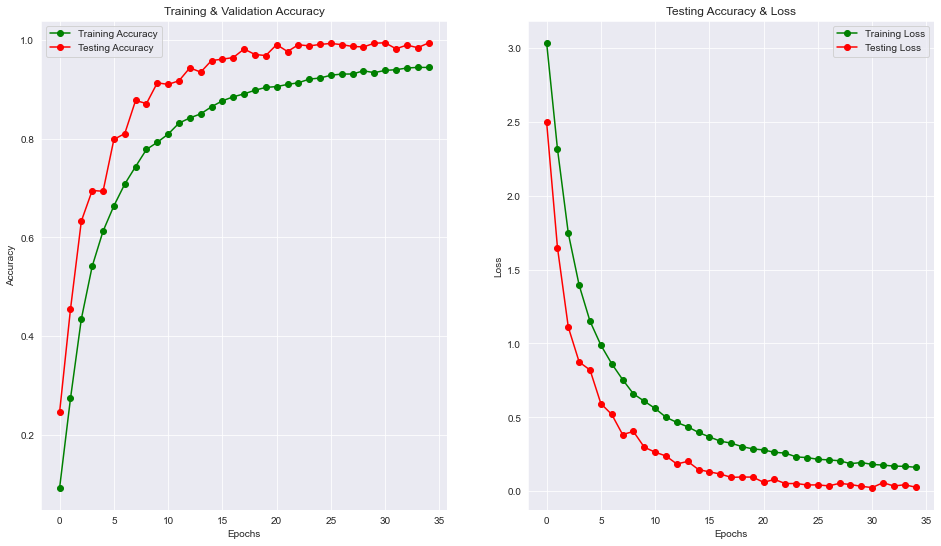

In [30]:
epochs = [i for i in range(35)]
fig , ax = plt.subplots(1,2)
train_acc = ASL_model.history['accuracy']
train_loss = ASL_model.history['loss']
val_acc = ASL_model.history['val_accuracy']
val_loss = ASL_model.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [31]:
predictions = model.predict_classes(X_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5] 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([ 6,  5, 10,  0,  3], dtype=int64)

## Classification Report
Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [32]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       0.97      1.00      0.99       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      0.99      0.99       247
     Class 6       1.00      1.00      1.00       348
     Class 7       0.99      1.00      1.00       436
     Class 8       0.99      1.00      0.99       288
    Class 10       1.00      0.97      0.98       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.97      1.00      0.98       394
    Class 13       0.95      1.00      0.97       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       0.99      1.00      1.00       144
    Class 18       1.00    

## Confusion matrix

In [33]:
cm = confusion_matrix(y,predictions)

In [34]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

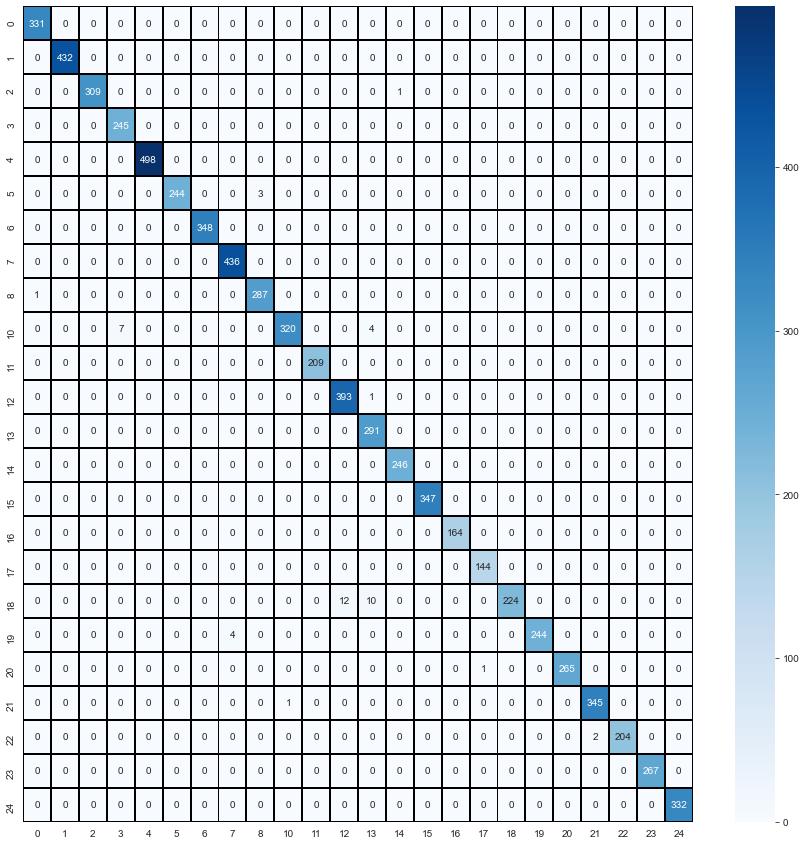

In [35]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

## Predict Labels

In [36]:
predicted_classes = model.predict(X_test)

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [37]:
import numpy as np
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [38]:
predicted_classes.shape, y.shape

((7172,), (7172,))

Found 3130 correct labels


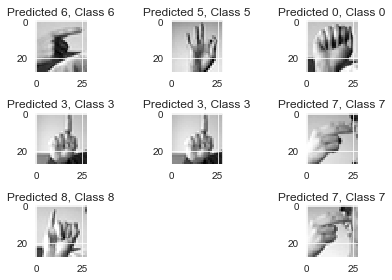

In [39]:
correct = np.where(predicted_classes==y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y[correct]))
    plt.tight_layout()

Found 4042 incorrect labels


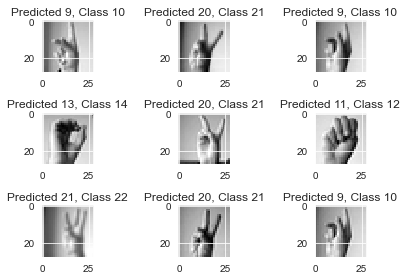

In [40]:
incorrect = np.where(predicted_classes!=y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y[incorrect]))
    plt.tight_layout()

## Limitation of convolutional neural networks

CNN do not encode the position and orientation of object

Lack of ability to be spatially invariant to the input data


## Later work

I plan to work next on video recognition using CNN

## References

Leban, J. (2020, May 22). Image recognition with Machine Learning on Python, Convolutional Neural Network. Retrieved from https://towardsdatascience.com/image-recognition-with-machine-learning-on-python-convolutional-neural-network-363073020588

Rao, A. (2020, July 20). Convolutional Neural Network Tutorial (CNN) – Developing An Image Classifier In Python Using TensorFlow. Retrieved from https://www.edureka.co/blog/convolutional-neural-network/

Sharma, A. (2017, December 5th). Convolutional Neural Networks in Python with Keras. Retrieved from https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

Sumit, S. H. (2018, July 21). Drawbacks of Convolutional Neural Networks. Retrieved from https://sakhawathsumit.github.io/sumit.log/2018/07/21/drawbacks-of-convolutional-neural-networks.html

